# Imports

In [1]:
import os
os.chdir("D:\PulpitE\FPL_ML")

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data/previous/FPL_logs.csv')

# General info

In [4]:
df.columns

Index(['Date', 'Day', 'Venue', 'Team', 'Opponent', 'Name', 'Start', 'Pos',
       'Min', 'Gls',
       ...
       'xG_team_15', 'xGA_team_15', 'xG_opp_15', 'xGA_opp_15', 'xG_team_30',
       'xGA_team_30', 'xG_opp_30', 'xGA_opp_30', 'xG_diff', 'Avg_FPL_points'],
      dtype='object', length=114)

In [5]:
df.shape

(18835, 114)

In [6]:
df.describe()

,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,T_att,T_succ,Team_score,Opp_score,Team_CS,Was_home,GW,Clean_name,FPL_ast,Bonus,Bps,Player_CS,Creativity,Element,Fixture,Player_GC,Goals_scored,ICT_index,Influence,FPL_min,Own_goals,Penalties_missed,Penalties_saved,Saves,Selected,Threat,FPL_points,Transfers_balance,Transfers_in,Transfers_out,Price,FPL_GW,xP,FPL_xA,FPL_xGI,FPL_xG,FPL_xGC,Opp_rating,Team_rating,Min_points,xG_team,xGA_team,xG_opp,xGA_opp,xG_team_2,xGA_team_2,xG_opp_2,xGA_opp_2,xG_team_4,xGA_team_4,xG_opp_4,xGA_opp_4,xG_team_5,xGA_team_5,xG_opp_5,xGA_opp_5,xG_team_8,xGA_team_8,xG_opp_8,xGA_opp_8,xG_team_10,xGA_team_10,xG_opp_10,xGA_opp_10,xG_team_15,xGA_team_15,xG_opp_15,xGA_opp_15,xG_team_30,xGA_team_30,xG_opp_30,xGA_opp_30,xG_diff,Avg_FPL_points
count,18831.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18485.000000,18485.000000,18835.000000,18485.000000,18485.000000,18485.000000,18485.000000,18485.000000,18485.000000,18485.000000,18485.000000,18327.000000,18485.000000,18485.000000,18485.000000,18485.000000,18485.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,0.0,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.00000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,1.883500e+04,18835.000000,18835.000000,1.883500e+04,1.883500e+04,1.883500e+04,18835.000000,0.0,18682.000000,1065.000000,1065.000000,1065.000000,1065.000000,18835.000000,18835.000000,0.0,18835.000000,18835.000000,18835.000000,18835.000000,18579.000000,18579.000000,18564.000000,18564.000000,18579.000000,18579.000000,18564.000000,18564.000000,18579.000000,18579.000000,18564.000000,18564.000000,18579.000000,18579.000000,18564.000000,18564.000000,18579.000000,18579.000000,18564.000000,18564.000000,18579.000000,18579.000000,18564.000000,18564.000000,18579.000000,18579.000000,18564.000000,18564.000000,18835.000000,18835.000000
mean,54.482343,0.077568,0.057393,0.006212,0.007645,0.704115,0.235094,0.099230,0.002548,34.665242,0.913606,0.495407,0.646795,0.080590,0.074450,0.059594,1.285258,0.140871,22.742440,28.524912,60.068620,2.174358,19.681471,0.995185,0.984636,0.482878,1.507778,1.304115,0.301248,0.501035,18.534324,NaN,0.071410,0.190921,10.156464,0.186727,7.926445,295.595062,180.706238,0.790178,0.076825,2.79562,11.583860,54.201858,0.002761,0.001434,0.000956,0.156464,3.941718e+05,8.457287,2.364056,9.905215e+03,3.080575e+04,2.090051e+04,5.280388,NaN,2.565084,0.058573,0.144338,0.085784,0.952883,1779.986550,1799.494167,NaN,1.552427,1.392760,1.392760,1.552427,1.544895,1.385889,1.454759,1.474413,1.537944,1.381850,1.462117,1.467374,1.535201,1.380097,1.456418,1.463815,1.528608,1.376926,1.447683,1.453159,1.525195,1.374224,1.444952,1.448240,1.514765,1.369501,1.439811,1.441110,1.499020,1.358862,1.430079,1.431936,0.159667,2.364056
std,39.030327,0.299346,0.249982,0.082527,0.091852,1.174262,0.567565,0.303211,0.050419,29.628310,1.337113,0.886112,1.014420,0.198993,0.177482,0.152113,1.830469,0.422990,22.956408,26.513288,34.049023,2.865512,18.792219,1.603505,1.627600,0.955735,1.336256,1.243183,0.458812,0.500012,11.401825,NaN,0.280792,0.643270,10.939022,0.389702,13.020526,189.962155,114.037794,1.093650,0.297759,3.43800,14.601924,39.226560,0.052472,0.037835,0.030900,0.805956,8.914425e+05,15.637547,2.990398,9.134212e+04,9.006681e+04,5.405274e+04,1.330282,NaN,2.484458,0.125945,0.273420,0.214641,0.987155,109.786296,110.617281,NaN,0.935472,0.888947,0.888947,0.935472,0.716942,0.656803,0.691510,0.668948,0.590161,0.516669,0.572637,0.527166,0.561195,0.482855,0.543468,0.489521,0.520333,0.431883,0.498843,0.435604,0.509086,0.410460,0.486396,0.413649,0.488901,0.382159,0.469306,0.385265,0.469084,0.357255,0.447688,0.359797,1.486114,1.268566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [7]:
df[["xP", "FPL_points"]].describe()

,xP,FPL_points
count,18682.000000,18835.000000
mean,2.565084,2.364056
std,2.484458,2.990398
min,-3.000000,-4.000000
25%,1.000000,0.000000
50%,2.000000,1.000000
75%,3.500000,3.000000
max,19.000000,24.000000


In [8]:
df["xP"].sum(), df["FPL_points"].sum()

(47920.9, 44527)

In [9]:
df["xG"].sum(), df["Gls"].sum()

(1489.7000000000003, 1461.0)

In [10]:
df["xA"].sum(), df["Ast"].sum()

(1101.6, 1081.0)

In [11]:
df.isna().sum().sort_values(ascending=False).head(30)

Min_points    18835
FPL_GW        18835
Clean_name    18835
FPL_xG        17770
FPL_xGC       17770
FPL_xGI       17770
FPL_xA        17770
Cmp%            508
T_att           350
Blocks          350
PrgC            350
Carries         350
PrgP            350
Att             350
Cmp             350
GCA             350
SCA             350
xA              350
npxG            350
xG              350
T_succ          350
Touches         350
Tkl             350
xGA_opp_8       271
xG_opp_8        271
xGA_opp_30      271
xG_opp_30       271
xG_opp_2        271
xGA_opp_2       271
xG_opp_4        271
dtype: int64

# Plots

<AxesSubplot:xlabel='Team', ylabel='FPL_points'>

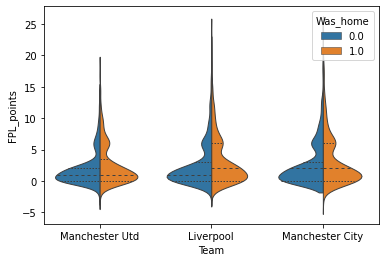

In [12]:
sns.violinplot(data=df[df["Team"].isin(["Liverpool", "Manchester City", "Manchester Utd"])], 
               x="Team", y="FPL_points", hue="Was_home",
               split=True, inner="quart", linewidth=1)

In [13]:
df["PKatt"].sum(), df["PK"].sum(), df["Penalties_saved"].sum()

(144.0, 117.0, 18)

[Text(0, 0, '100.00%'),
 Text(0, 0, '81.25%'),
 Text(0, 0, '12.50%'),
 Text(0, 0, '6.25%')]

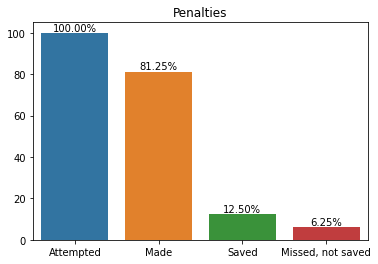

In [14]:
att = df["PKatt"].sum()
made = df["PK"].sum()
saved = df["Penalties_saved"].sum()
missed = att - made - saved
[att, made, saved, missed] = [att, made, saved, missed] / att * 100

ax = sns.barplot(x=["Attempted", "Made", "Saved", "Missed, not saved"], y=[att, made, saved, missed])
ax.set(title='Penalties')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

[Text(0, 0, '62.31%'), Text(0, 0, '37.69%')]

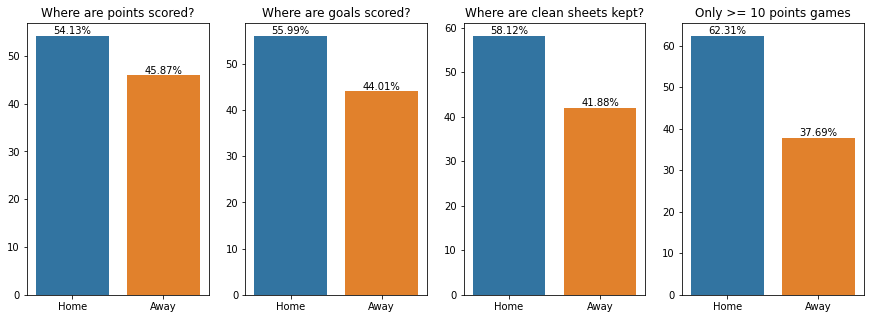

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(15, 5)

# ax1
home = df[df["Was_home"] == True]["FPL_points"].sum()
not_home = df[df["Was_home"] == False]["FPL_points"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax1)
ax.set(title='Where are points scored?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

# ax2
home = df[df["Was_home"] == True]["Gls"].sum()
not_home = df[df["Was_home"] == False]["Gls"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax2)
ax.set(title='Where are goals scored?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

# ax3
home = df[df["Was_home"] == True]["Player_CS"].sum()
not_home = df[df["Was_home"] == False]["Player_CS"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax3)
ax.set(title='Where are clean sheets kept?')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

# ax4
home = df[(df["Was_home"] == True) & (df["FPL_points"] >= 10)]["Player_CS"].sum()
not_home = df[(df["Was_home"] == False) & (df["FPL_points"] >= 10)]["Player_CS"].sum()
[home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["Home", "Away"], y=[home, not_home], ax=ax4)
ax.set(title='Only >= 10 points games')
ax.bar_label(ax.containers[0], fmt='%.2f%%', label_type='edge')

[Text(0, 0, '1.99'),
 Text(0, 0, '2.17'),
 Text(0, 0, '2.52'),
 Text(0, 0, '2.76')]

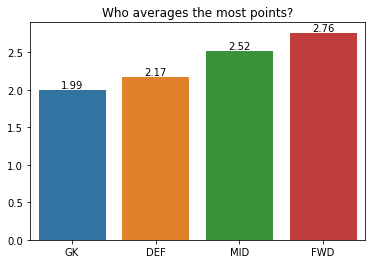

In [16]:
gks = df[df["FPL_pos"] == "GK"]["FPL_points"].mean()
defs = df[df["FPL_pos"] == "DEF"]["FPL_points"].mean()
mids = df[df["FPL_pos"] == "MID"]["FPL_points"].mean()
fwds = df[df["FPL_pos"] == "FWD"]["FPL_points"].mean()
# [home, not_home] = [home, not_home] / (home + not_home) * 100

ax = sns.barplot(x=["GK", "DEF", "MID", "FWD"], y=[gks, defs, mids, fwds])
ax.set(title='Who averages the most points?')
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')

# Relation with target variable

In [17]:
df

,Date,Day,Venue,Team,Opponent,Name,Start,Pos,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Cmp%,PrgP,Carries,PrgC,T_att,T_succ,Season,WDL,Team_score,Opp_score,Team_CS,Was_home,GW,Clean_name,FPL_name,FPL_team,FPL_opp_team,Name_original,FPL_pos,FPL_ast,Bonus,Bps,...,Selected,Threat,FPL_points,Transfers_balance,Transfers_in,Transfers_out,Price,FPL_GW,xP,FPL_xA,FPL_xGI,FPL_xG,FPL_xGC,Opp_rating,Team_rating,Min_points,xG_team,xGA_team,xG_opp,xGA_opp,xG_team_2,xGA_team_2,xG_opp_2,xGA_opp_2,xG_team_4,xGA_team_4,xG_opp_4,xGA_opp_4,xG_team_5,xGA_team_5,xG_opp_5,xGA_opp_5,xG_team_8,xGA_team_8,xG_opp_8,xGA_opp_8,xG_team_10,xGA_team_10,xG_opp_10,xGA_opp_10,xG_team_15,xGA_team_15,xG_opp_15,xGA_opp_15,xG_team_30,xGA_team_30,xG_opp_30,xGA_opp_30,xG_diff,Avg_FPL_points
0,2021-08-21,Sat,Home,Brighton,Watford,Aaron-Connolly,N,FW,45.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.3,0.3,0.0,1.0,0.0,1.0,2.0,50.0,0.0,5.0,2.0,0.0,0.0,2021-22,W,2,0,1.0,1.0,2,NaN,Aaron-Connolly,Brighton,Watford,Aaron Connolly,FWD,0,0,-2,...,15599,6.0,1,-1682,1899,3581,5.5,NaN,2.2,NaN,NaN,NaN,NaN,1681.872192,1728.483398,NaN,1.778960,0.407224,0.407224,1.778960,1.685300,1.795480,1.350360,1.137180,1.685300,1.795480,1.350360,1.137180,1.685300,1.795480,1.350360,1.137180,1.685300,1.795480,1.350360,1.137180,1.685300,1.795480,1.350360,1.137180,1.685300,1.795480,1.350360,1.137180,1.685300,1.795480,1.350360,1.137180,1.371736,0.555556
1,2021-08-28,Sat,Home,Brighton,Everton,Aaron-Connolly,N,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-22,L,0,2,0.0,1.0,3,NaN,Aaron-Connolly,Brighton,Everton,Aaron Connolly,FWD,0,0,0,...,15457,0.0,0,-737,2897,3634,5.5,NaN,0.0,NaN,NaN,NaN,NaN,1780.006958,1738.980469,NaN,0.701622,1.548680,1.548680,0.701622,1.732130,1.101352,2.122880,0.773347,1.732130,1.101352,2.122880,0.773347,1.732130,1.101352,2.122880,0.773347,1.732130,1.101352,2.122880,0.773347,1.732130,1.101352,2.122880,0.773347,1.732130,1.101352,2.122880,0.773347,1.732130,1.101352,2.122880,0.773347,-0.847058,0.555556
2,2021-09-19,Sun,Home,Brighton,Leicester City,Aaron-Connolly,N,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-22,W,2,1,0.0,1.0,5,NaN,Aaron-Connolly,Brighton,Leicester,Aaron Connolly,FWD,0,0,0,...,9659,0.0,0,-2548,301,2849,5.4,NaN,0.0,NaN,NaN,NaN,NaN,1795.105225,1735.531982,NaN,1.474380,1.253730,1.253730,1.474380,0.494762,1.139233,1.036905,2.095710,1.113446,1.120292,0.842163,1.951173,1.113446,1.120292,0.842163,1.951173,1.113446,1.120292,0.842163,1.951172,1.113446,1.120292,0.842163,1.951172,1.113446,1.120292,0.842163,1.951172,1.113446,1.120292,0.842163,1.951172,0.220650,0.555556
3,2021-09-27,Mon,Away,Brighton,Crystal Palace,Aaron-Connolly,N,LM,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,33.3,0.0,2.0,0.0,1.0,0.0,2021-22,D,1,1,0.0,0.0,6,NaN,Aaron-Connolly,Brighton,Crystal Palace,Aaron Connolly,FWD,0,0,2,...,9738,0.0,1,-232,1187,1419,5.3,NaN,1.0,NaN,NaN,NaN,NaN,1708.091675,1744.599365,NaN,0.649566,1.368360,1.368360,0.649566,0.881141,0.991758,1.768944,1.422747,1.060716,0.984855,1.455195,1.251353,1.185633,1.146980,1.228496,1.238501,1.185633,1.146980,1.228496,1.238501,1.185633,1.146980,1.228496,1.238501,1.185633,1.146980,1.228496,1.238501,1.185633,1.146980,1.228496,1.238501,-0.718794,0.555556
4,2021-10-02,Sat,Home,Brighton,Arsenal,Aaron-Connolly,N,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-22,D,0,0,1.0,1.0,7,NaN,Aaron-Connolly,Brighton,Arsenal,Aaron Connolly,FWD,0,0,0,...,9730,0.0,0,-141,936,1077,5.3,NaN,0.0,NaN,NaN,NaN,NaN,1844.299316,1739.216797,NaN,1.115510,0.364310,0.364310,1.115510,1.061973,1.311045,1.272135,0.877870,0.778368,1.225139,1.336556,1.701440,0.978486,1.061556,1.195265,2.089416,1.096288,1.183877,1.166696,2.055877,1.096288,1.183877,1.166696,2.055877,1.096288,1.183877,1.166696,2.055877,1.096288,1.183877,1

<AxesSubplot:xlabel='xG_opp_4', ylabel='xP'>

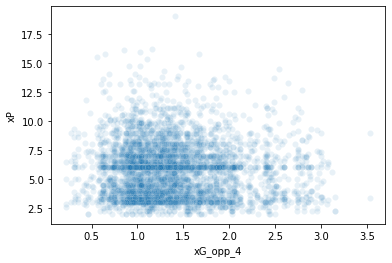

In [20]:
sns.scatterplot(data=df[(df["FPL_points"] > 2) & (df["FPL_pos"] != "GK") & (df["Min"] > 60)], x="xG_opp_4", y="xP", alpha=0.1)